In [76]:
import os 
import pandas as pd 
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from qmplot import manhattanplot
os.chdir("/mnt/BioHome/jreyna/jreyna/projects/dchallenge/")
outdir = 'results/main/basic_stats/'
os.makedirs(outdir, exist_ok=True)

## Summarize GWAS

In [77]:
gwas_fn = 'results/main/2021_Nikhil_eQTL/Data/T1D_GWAS/T1D_34012112_Gaulton/GWAS_input_colocalization_pval_lt_5eMinus8.txt'
#gwas_fn = 'results/main/2021_Nikhil_eQTL/Data/T1D_GWAS/T1D_34012112_Gaulton/GWAS_input_colocalization.txt'

gwas = pd.read_table(gwas_fn)
gwas['P'] = gwas['P'].astype(float)

# removing zero value entries 
gwas = gwas.loc[(gwas['P'] != 0),:]

# removing chr in chromosomal name 
gwas['CHR'] = gwas['CHR'].str.replace('chr', '')

In [263]:
float(5e-8)

5e-08

In [267]:
-np.log10(5 * 10**(-8))

7.301029995663981

In [78]:
gwas.head()

,CHR,POS,BETA,SE,P,N
0,1,25293941,0.076575,0.013960,4.130000e-08,520580
1,1,25294607,0.077268,0.014040,3.730000e-08,520580
2,1,25294878,0.076429,0.013922,4.030000e-08,520580
3,1,25295580,0.076999,0.013951,3.400000e-08,520580
4,1,25296478,0.077267,0.014047,3.780000e-08,520580


In [254]:
gwas['P'].describe()

count     4.389100e+04
mean      1.825176e-09
std       6.918147e-09
min      4.940656e-324
25%       5.155000e-46
50%       2.550000e-22
75%       4.495000e-12
max       4.990000e-08
Name: P, dtype: float64

In [259]:
gwas['P'].apply(lambda x: np.log10(x) * -1 ).describe()

count    43891.000000
mean        42.233487
std         55.076925
min          7.301899
25%         11.347271
50%         21.593460
75%         45.287772
max        323.306215
Name: P, dtype: float64

In [79]:
print('The GWAS has {} snps.'.format(gwas.shape[0]))

The GWAS has 43891 snps.


In [80]:
fn = os.path.join(outdir, 'chiou_et_al.num_gwas_snps.txt')
with open(fn, 'w') as f:
    f.write(str(gwas.shape[0]))

In [81]:
gwas = gwas[['CHR', 'POS', 'P', 'BETA', 'SE', 'N']]

In [268]:
gwas

,CHR,POS,P,BETA,SE,N
0,1,25293941,4.130000e-08,0.076575,0.013960,520580
1,1,25294607,3.730000e-08,0.077268,0.014040,520580
2,1,25294878,4.030000e-08,0.076429,0.013922,520580
3,1,25295580,3.400000e-08,0.076999,0.013951,520580
4,1,25296478,3.780000e-08,0.077267,0.014047,520580
...,...,...,...,...,...,...
45989,22,37592106,5.990000e-12,0.097271,0.014138,520580
45990,22,37593091,2.380000e-10,0.104464,0.016491,520580
45991,22,37593156,2.090000e-10,0.104976,0.016520,520580
45992,22,37605797,3.510000e-09,0.096987,0.016422,520580


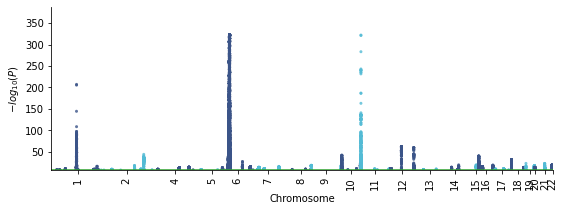

In [271]:
ax = manhattanplot(data=gwas,
                   chrom='CHR',
                   pv='P',
                   xticklabel_kws={"rotation": "vertical"},
                   logp=True)

## Summarize eQTLs

In [176]:
eqtl_fn1 = 'results/main/2021_Nikhil_eQTL/Data/eqtl_sqtl_summ_stats/BLUEPRINT_eQTL/*.txt.gz'
eqtl_fn1 = glob.glob(eqtl_fn1)
eqtl_fn2 = 'results/main/2021_Nikhil_eQTL/Data/eqtl_sqtl_summ_stats/DICE_eQTL//*.txt.gz'
eqtl_fn2 = glob.glob(eqtl_fn2)
get_cell_type = lambda x: os.path.basename(x).split('.')[0]
dice_published = ['CLASSICAL_MONOCYTES', 'B_NAIVE', 'CD4_NAIVE', 'CD8_NAIVE', 'NK_CD16POS']
dice_published += ['CM', 'NB', 'CD4N', 'CD8N', 'NK']
eqtl_fn2 = [x for x in eqtl_fn2 if get_cell_type(x) in dice_published]
eqtl_fns = eqtl_fn1 + eqtl_fn2

In [177]:
eqtl_data = []
for fn in eqtl_fns:
    df = pd.read_table(fn)

    study = fn.split('/')[5].replace('_eQTL', '')
    cline = fn.split('/')[6].split('.')[0]
    
    df['study'] = study
    df['cline'] = cline 
    
    eqtl_data.append(df)


In [178]:
eqtl_data = pd.concat(eqtl_data)

In [179]:
eqtl_data.head()

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,study,cline
0,RP11-809C18.3,3958,1.04397,193.339,143.536,10:1116997,442418,6.050140e-06,0.437403,0.003996,7.116960e-03,3.315073e-02,BLUEPRINT,Neutrophil
1,WDR37,5379,1.09896,341.843,148.721,10:1108544,13065,1.099870e-07,0.482763,0.000999,1.715620e-04,1.220888e-03,BLUEPRINT,Neutrophil
2,ADARB2,5693,1.02652,381.476,150.294,10:1282530,54456,1.555440e-33,1.067640,0.000999,8.202270e-27,5.319393e-25,BLUEPRINT,Neutrophil
3,RP11-482E14.1,6377,1.03604,509.748,155.394,10:3507739,-21348,3.410100e-07,0.700451,0.000999,6.935080e-04,4.405235e-03,BLUEPRINT,Neutrophil
4,RP11-433J20.2,6735,1.12300,432.924,145.437,10:4392931,325798,3.399140e-06,-0.208851,0.004995,5.987540e-03,2.878668e-02,BLUEPRINT,Neutrophil


In [180]:
eqtl_summary = eqtl_data.groupby(['study', 'cline'])

#### Total number of eQTL's (SNP-gene pairs)

In [181]:
total_eqtls = eqtl_summary.sid.apply(len).reset_index()
total_eqtls.sort_values(['sid', 'study', 'cline'], ascending=[False, True, True], inplace=True)
total_eqtls.head()

,study,cline,sid
0,BLUEPRINT,Monocyte,7716
2,BLUEPRINT,T-cell,7211
1,BLUEPRINT,Neutrophil,6399
4,DICE,CD4_NAIVE,2504
5,DICE,CD8_NAIVE,2373


[Text(0, 0, 'Monocyte'),
 Text(1, 0, 'T-cell'),
 Text(2, 0, 'Neutrophil'),
 Text(3, 0, 'CD4_NAIVE'),
 Text(4, 0, 'CD8_NAIVE'),
 Text(5, 0, 'CLASSICAL_MONOCYTES'),
 Text(6, 0, 'NK_CD16POS'),
 Text(7, 0, 'B_NAIVE')]

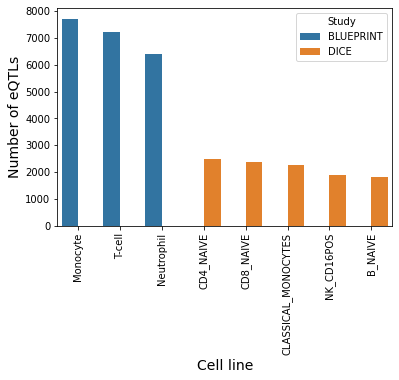

In [182]:
fig, ax = plt.subplots()
sns.barplot(data=total_eqtls.rename(columns={'study': 'Study'}), 
            x='cline',
            y='sid',
            hue='Study')
ax.set_xlabel('Cell line', fontsize=14)
ax.set_ylabel('Number of eQTLs', fontsize=14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

In [183]:
total_eqtls

,study,cline,sid
0,BLUEPRINT,Monocyte,7716
2,BLUEPRINT,T-cell,7211
1,BLUEPRINT,Neutrophil,6399
4,DICE,CD4_NAIVE,2504
5,DICE,CD8_NAIVE,2373
6,DICE,CLASSICAL_MONOCYTES,2252
7,DICE,NK_CD16POS,1882
3,DICE,B_NAIVE,1826


In [184]:
total_eqtls.groupby('study').describe()

sid                                                           \
          count         mean         std     min     25%     50%     75%   
study                                                                      
BLUEPRINT   3.0  7108.666667  664.436854  6399.0  6805.0  7211.0  7463.5   
DICE        5.0  2167.400000  300.306177  1826.0  1882.0  2252.0  2373.0   

                   
              max  
study              
BLUEPRINT  7716.0  
DICE       2504.0

#### Total number of unique SNPs per study + cell line

In [185]:
uniq_snps = eqtl_summary.sid.nunique().reset_index()
uniq_snps.sort_values(['sid', 'study', 'cline'], ascending=[False, True, True], inplace=True)

In [186]:
uniq_snps.groupby('study').describe()

sid                                                           \
          count         mean         std     min     25%     50%     75%   
study                                                                      
BLUEPRINT   3.0  6547.666667  755.469611  5696.0  6253.0  6810.0  6973.5   
DICE        5.0  2080.400000  315.385161  1749.0  1753.0  2165.0  2301.0   

                   
              max  
study              
BLUEPRINT  7137.0  
DICE       2434.0

#### Total number of unique eGenes per study + cell line

In [187]:
uniq_egenes = eqtl_summary.pid.nunique().reset_index()
uniq_egenes.sort_values(['pid', 'study', 'cline'], ascending=[False, True, True], inplace=True)

In [188]:
uniq_egenes.groupby('study').describe()

pid                                                           \
          count         mean         std     min     25%     50%     75%   
study                                                                      
BLUEPRINT   3.0  7108.666667  664.436854  6399.0  6805.0  7211.0  7463.5   
DICE        5.0  2167.400000  300.306177  1826.0  1882.0  2252.0  2373.0   

                   
              max  
study              
BLUEPRINT  7716.0  
DICE       2504.0

#### Making a master

In [189]:
master_eqtl_table = pd.merge(total_eqtls, uniq_snps, on=['study', 'cline'])
master_eqtl_table = pd.merge(master_eqtl_table, uniq_egenes, on=['study', 'cline'])

In [190]:
master_eqtl_table.head()

,study,cline,sid_x,sid_y,pid
0,BLUEPRINT,Monocyte,7716,7137,7716
1,BLUEPRINT,T-cell,7211,6810,7211
2,BLUEPRINT,Neutrophil,6399,5696,6399
3,DICE,CD4_NAIVE,2504,2434,2504
4,DICE,CD8_NAIVE,2373,2301,2373


In [191]:
master_eqtl_table.columns = ['Study', 'Cell Line', 'Number of eQTLs', 'Number of Unique SNPs', 'Number of Unique eGenes']

In [192]:
master_eqtl_table.head()

,Study,Cell Line,Number of eQTLs,Number of Unique SNPs,Number of Unique eGenes
0,BLUEPRINT,Monocyte,7716,7137,7716
1,BLUEPRINT,T-cell,7211,6810,7211
2,BLUEPRINT,Neutrophil,6399,5696,6399
3,DICE,CD4_NAIVE,2504,2434,2504
4,DICE,CD8_NAIVE,2373,2301,2373


In [193]:
fn = os.path.join(outdir, 'description_of_eqtl_study.xlsx')
master_eqtl_table.to_excel(fn, index=False)

## Summarize colocalized SNPs

In [244]:
# loading and concat all the data
data = []
for fn in glob.glob('results/main/loop_analysis/Coloc_Approach/T1D_34012112_Gaulton/*/*/*/master.tsv'):
    
    dice_cline = fn.split('/')[5]
    study = fn.split('/')[6]
    eqtl_cline = fn.split('/')[7]
    
    # skip DICE datasets which are still not published
    if (dice_cline not in dice_published):
        continue
        
    # skip DICE cell lines which are stimulated
    # (not filtered correctly in the previous step)
    if (eqtl_cline in ['CD4_N_STIM', 'CD8_N_STIM']):
        continue
    
    df = pd.read_table(fn, header=0)
    df['dice_cline'] = dice_cline
    df['eqtl_cline'] = eqtl_cline
    df['study'] = study
    data.append(df)
    
data = pd.concat(data)
data.rename(columns={'5kb_gname': 'fivekb_gname'}, inplace=True)

In [245]:
new_order = [
 'sid',
 'rs_id',
 'gene_name',
 'dice_cline',
 'eqtl_cline',
 'study',
 'gene_id',
 'chrom',
 'snp_pos',
 'gene_start',
 'gene_end',
 'is_eqtl_pair',
 'is_coloc_pair',
 'is_closest_gene',
 'has_fithichip_loop',
 'nvar',
 'shape1',
 'shape2',
 'dist',
 'npval',
 'slope',
 'ppval',
 'bpval',
 'qval',
 'pp_H0_Coloc_Summary',
 'pp_H1_Coloc_Summary',
 'pp_H2_Coloc_Summary',
 'pp_H3_Coloc_Summary',
 'pp_H4_Coloc_Summary',
 'ref',
 'alt',
 'AC',
 'AF',
 'AN',
 'gwas_slope',
 'gwas_slope_se',
 'gwas_pval_nominal',
 'SampleSize']

In [246]:
data = data.loc[:, new_order]
data.drop_duplicates(subset=['sid', 'gene_name', 'dice_cline', 'eqtl_cline', 'study'], inplace=True)

In [247]:
# master_fn = os.path.join(outdir, 'super_master.snp_gene_loop.analysis.tsv')
# data.to_csv(master_fn, sep='\t', index=False, na_rep='nan')

## Colocalization Summary

I want to know how many colocalization comparisons there are total

In [248]:
coloc_only = data[(data.is_coloc_pair == 1)]
print(coloc_only.shape[0])

56


In [249]:
coloc_only

,sid,rs_id,gene_name,dice_cline,eqtl_cline,study,gene_id,chrom,snp_pos,gene_start,...,pp_H4_Coloc_Summary,ref,alt,AC,AF,AN,gwas_slope,gwas_slope_se,gwas_pval_nominal,SampleSize
95,1:114439522,rs1310183,BCL2L15,NB,B_NAIVE,DICE_eQTL,ENSG00000188761.7,chr1,114439522,114420790,...,1.000000,T,C,1893.0,0.377995,5008.0,-0.127193,0.015211,6.180000e-17,520580.0
162,1:192536813,rs2816316,RGS1,NB,B_NAIVE,DICE_eQTL,ENSG00000090104.7,chr1,192536813,192544857,...,0.886197,C,A,3995.0,0.797724,5008.0,0.105379,0.018600,1.460000e-08,520580.0
366,11:64107735,rs663743,AP003774.1,NB,B_NAIVE,DICE_eQTL,ENSG00000236935.1,chr11,64107735,64092522,...,0.959176,G,A,993.0,0.198283,5008.0,-0.099964,0.015092,3.500000e-11,520580.0
465,12:9866349,rs7977720,RP11-75L1.1,NB,B_NAIVE,DICE_eQTL,ENSG00000256582.1,chr12,9866349,9856673,...,0.979363,C,T,2594.0,0.517971,5008.0,-0.084924,0.013982,1.250000e-09,520580.0
553,12:56470625,rs11171739,RPS26,NB,B_NAIVE,DICE_eQTL,ENSG00000197728.5,chr12,56470625,56435637,...,0.999999,C,T,2781.0,0.555312,5008.0,-0.221374,0.014087,1.190000e-55,520580.0
646,12:112523970,rs11066156,ERP29,NB,B_NAIVE,DICE_eQTL,ENSG00000089248.6,chr12,112523970,112451120,...,1.000000,C,T,1882.0,0.375799,5008.0,-0.168830,0.025851,6.540000e-11,405537.0
891,16:11439303,rs12149160,RMI2,NB,B_NAIVE,DICE_eQTL,ENSG00000175643.7,chr16,11439303,11343476,...,0.999437,G,T,1806.0,0.360623,5008.0,0.098787,0.014092,2.380000e-12,520580.0
1855,6:26394320,rs1131936,BTN3A1,NB,B_NAIVE,DICE_eQTL,ENSG00000026950.12,chr6,26394320,26402465,...,0.999982,A,G,1477.0,0.294928,5008.0,-0.122869,0.021271,7.630000e-09,520580.0
1963,6:126703390,rs9398804,CENPW,NB,B_NAIVE,DICE_eQTL,ENSG00000203760.4,chr6,126703390,126661320,...,1.000000,T,A,3097.0,0.618411,5008.0,0.104421,0.014102,1.320000e-13,520580.0
2019,7:26711104,rs3757654,SKAP2,NB,B_NAIVE,DICE_eQTL,ENSG00000005020.8,chr7,26711104,26706681,...,0.999999,C,T,692.0,0.138179,5008.0,-0.111443,0.016289,7.830000e-12,520580.0


I want to know the breakdown in terms of gene

In [250]:
coloc_only.value_counts(subset=['sid', 'gene_name'])

sid           gene_name   
11:64107477   AP003774.1      4
12:56401085   RPS26           4
12:9866349    RP11-75L1.1     2
21:43855067   UBASH3A         2
7:26907123    SKAP2           1
15:79231478   CTSH            1
16:28555706   SULT1A2         1
16:28539848   SULT1A2         1
16:28534038   SULT1A2         1
16:11439679   RMI2            1
16:11439303   RMI2            1
16:11426331   RP11-485G7.6    1
              RMI2            1
15:79237293   CTSH            1
12:9889157    CLECL1          1
18:12775963   RP11-973H7.4    1
12:56470625   RPS26           1
12:56435929   RPS26           1
12:112523970  TMEM116         1
              ERP29           1
12:112521448  TMEM116         1
12:112313208  TMEM116         1
11:64107735   AP003774.1      1
17:43965129   KANSL1          1
18:67511645   DOK6            1
7:26819917    SKAP2           1
6:126703390   CENPW           1
7:26711104    SKAP2           1
6:33580350    ITPR3           1
6:33548090    BAK1            1
6:33541507   

I want to know the breakdown in terms of cell line

In [251]:
coloc_only.value_counts(subset=['gene_name', 'sid', 'dice_cline'])

gene_name     sid           dice_cline
AP003774.1    11:64107477   CM            2
ZSCAN23       6:28421567    NK            1
CENPW         6:126703390   NB            1
KANSL1        17:43965129   CM            1
ITPR3         6:33580350    NK            1
FKRP          19:47203356   CM            1
ERP29         12:112523970  NB            1
DOK6          18:67539392   CD8N          1
              18:67525857   CD4N          1
              18:67524383   NK            1
              18:67511645   CM            1
CTSH          15:79237293   CM            1
              15:79231478   CM            1
CLECL1        12:9889157    CM            1
BTN3A2        6:26357898    CD4N          1
PTPN22        1:114086821   NK            1
BTN3A1        6:26394320    NB            1
BTN2A2        6:26390963    NK            1
              6:26383250    CM            1
BCL2L15       1:114439522   NB            1
BAK1          6:33548090    CM            1
              6:33541507    CM       

In [253]:
coloc_only[(coloc_only['gene_name'] == 'AP003774.1') & (coloc_only['sid'] == '11:64107477') & (coloc_only['dice_cline'] == 'CM')]

,sid,rs_id,gene_name,dice_cline,eqtl_cline,study,gene_id,chrom,snp_pos,gene_start,...,pp_H4_Coloc_Summary,ref,alt,AC,AF,AN,gwas_slope,gwas_slope_se,gwas_pval_nominal,SampleSize
417,11:64107477,rs479777,AP003774.1,CM,CLASSICAL_MONOCYTES,DICE_eQTL,ENSG00000236935.1,chr11,64107477,64092522,...,0.966839,T,C,1094.0,0.21845,5008.0,-0.099132,0.015066,4.710000e-11,520580.0
1422,11:64107477,rs479777,AP003774.1,CM,Monocyte,BLUEPRINT_eQTL,ENSG00000236935.1,chr11,64107477,64092522,...,0.972394,T,C,1094.0,0.21845,5008.0,-0.099132,0.015066,4.710000e-11,520580.0


## Breakdown of colocalized loops (SNP perspective)

I want to know how many colocalizations have a loop

In [216]:
coloc_loops_only = data[(data.is_coloc_pair == 1) & (data.has_fithichip_loop == 1)]
print(coloc_loops_only.shape[0])

9


I want to know the breakdown in terms of gene

In [217]:
coloc_loops_only.value_counts(subset=['sid', 'gene_name'])

sid          gene_name 
21:43855067  UBASH3A       2
16:11439303  RMI2          2
21:43823736  TMPRSS3       1
16:11439679  RMI2          1
15:79231478  CTSH          1
11:64107735  AP003774.1    1
11:64102948  AP003774.1    1
dtype: int64

I want to know the breakdown in terms of cell line

In [218]:
coloc_loops_only.value_counts(subset=['gene_name', 'sid', 'dice_cline'])

gene_name   sid          dice_cline
UBASH3A     21:43855067  CD8N          1
                         CD4N          1
TMPRSS3     21:43823736  CD4N          1
RMI2        16:11439679  CD8N          1
            16:11439303  NB            1
                         CD8N          1
CTSH        15:79231478  CM            1
AP003774.1  11:64107735  NB            1
            11:64102948  NK            1
dtype: int64

In [219]:
highly_cited_genes = ['BACH2','UBASH3A', 'PTPN22', 'SIRPG', 'CTSH', 'M6PR', 'RGS1']

## Breakdown of colocalized loops (Gene perspective)

In [220]:
coloc_loops_only.groupby(['gene_name']).rs_id.unique()

gene_name
AP003774.1      [rs663743, rs574087]
CTSH                    [rs12148472]
RMI2          [rs12149160, rs918738]
TMPRSS3                  [rs9784215]
UBASH3A                  [rs1893592]
Name: rs_id, dtype: object

In [221]:
coloc_loops_only.groupby(['gene_name']).rs_id.nunique().sort_values()

gene_name
CTSH          1
TMPRSS3       1
UBASH3A       1
AP003774.1    2
RMI2          2
Name: rs_id, dtype: int64

In [222]:
coloc_loops_only.groupby(['gene_name']).rs_id.nunique().sort_values().shape

(5,)

#### Making a master

In [223]:
coloc_summary = coloc_loops_only.loc[~coloc_loops_only.duplicated(subset=['study', 'eqtl_cline', 'sid', 'gene_id']), :]
coloc_summary = coloc_summary.groupby(['study', 'eqtl_cline']).apply(len)
coloc_summary = coloc_summary.reset_index()
coloc_summary.study = coloc_summary.study.str.replace('_eQTL', '')
coloc_summary = coloc_summary.sort_values(['study', 0, 'eqtl_cline'], ascending=[True, False, True])

coloc_summary.columns = ['Study', 'Cell Line', 'Number of SGLs']

fn = os.path.join(outdir, 'description_of_coloc_study.xlsx')
coloc_summary.to_excel(fn, index=False)